22 AGO 24

In [1]:
import pandas as pd, numpy as np
from statsmodels.api import OLS
import matplotlib.pyplot as plt
from numpy import linalg as la
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Problemas de Regresión como un Problema de Machine Learning

In [2]:
## Recordar, modelo de regresión lineal:

$$
y = X\beta + \epsilon
$$

$$
  \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_n \\
        \end{bmatrix}
        = \begin{bmatrix}
                1 & x_{1,1} & x_{1,2} & \ldots & x_{1,p}\\
                1 & x_{2,1} & x_{2,2} & \ldots & x_{2,p}\\
                \vdots & \vdots & \vdots & \ddots & \vdots\\
                1 & x_{n,1} & x_{n,2} & \ldots & x_{n,p}\\
          \end{bmatrix}  \begin{bmatrix} 
                \beta_{0}\\ 
                \beta_{1}\\
                \ldots \\
                \beta_{p}\\
             \end{bmatrix} + \begin{bmatrix} 
                \epsilon_{1}\\ 
                \epsilon_{2}\\
                \ldots \\
                \epsilon_{n}\\
             \end{bmatrix}
$$

Donde el criterio (de **mínimos cuadrados**) es minimizar la SUMA DEL CUADRADO DE LOS ERRORES:

$$
SSE = \epsilon^{\prime}\epsilon = (y - X\beta)^{\prime}(y - X\beta) 
$$

La solución al problema anterior es el estimador de Mínimos Cuadrados:

$$
\hat\beta = (X^{\prime}X)^{-1}X^{\prime}y
$$

y los valores predichos o estimados son:

$$
\hat y =  X\hat\beta
$$

In [3]:
# Visto como un modelo de machine learning, tenemos que entrenarlo en un conjunto de datos y probar su desempeño en otro, y lo que
# nos interesa es la PREDICCIÓN.

In [4]:
boston = pd.read_csv('boston_house_prices.csv')
boston.head()

,id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,A1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,A2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,A3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,A4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,A5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
boston.shape

(506, 15)

### Significado variables
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to ﬁve Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in '$1000s

In [6]:
df = boston
predictors = df.loc[:,'CRIM':'LSTAT']
response = df['MEDV']

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(predictors, response, test_size= 0.25, random_state=314)

model = OLS(ytrain, xtrain) #OLS asume que no hay intercepto
ols = model.fit() #aquí se entrena o se 'ajusta' el modelo.
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              654.2
Date:                Mon, 02 Sep 2024   Prob (F-statistic):                   3.71e-244
Time:                        19:43:34   Log-Likelihood:                         -1141.9
No. Observations:                 379   AIC:                                      2310.
Df Residuals:                     366   BIC:                                      2361.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1312      0.041     -3.236      0.001      -0.211      -0.051
ZN             0.0448      0.018      2.543      0.011       0.010       0.079
INDUS          0.0077      0.078      0.098      0.922      -0.146       0.161
CHAS           2.5157      1.045      2.407      0.017       0.460       4.571
NOX           -3.3773      4.116     -0.821      0.412     -11.470       4.716
RM             5.8394      0.374     15.619      0.000       5.104       6.575
AGE           -0.0104      0.016     -0.661      0.509      -0.041       0.020
DIS           -0.9479      0.228     -4.150      0.000      -1.397      -0.499
RAD            0.2115      0.080      2.654      0.008       0.055       0.368
TAX           -0.0119      0.005     -2.526      0.012      -0.021      -0.003
PTRATIO       -0.3033      0.135     -2.243      0.026      -0.569      -0.037
B              0.0146      0.003      4.538      0.000       0.008       0.021
LSTAT         -0.4181      0.060     -6.988      0.000      -0.536      -0.300
==============================================================================
Omnibus:                      187.113   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1593.538
Skew:                           1.898   Prob(JB):                         0.00
Kurtosis:                      12.300   Cond. No.                     8.96e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Lo que lo anterior nos dice es que podemos modelar el 'valor de una casa' como:


$MEDV = -0.1312*CRIM + 0.0448*ZN + 0.0077*INDUS + 2.5157*CHAS +...-0.4181*LSTAT$

In [8]:
y_ols = ols.predict(xtest)
z = (y_ols - ytest)**2
z.sum()/len(z) #error cuadrático medio (de predicción sobre conjunto de test/prueba) - mean squared error (mse)

24.880958509702708

In [9]:
y_ols #estas son las predicciones

125    22.168288
262    41.725985
40     34.681190
35     22.747024
375    26.901880
         ...    
203    41.375187
418     2.847329
466    12.730842
268    37.597809
43     24.361507
Length: 127, dtype: float64

In [10]:
ytest #los valores reales

125    21.4
262    48.8
40     34.9
35     18.9
375    15.0
       ... 
203    48.5
418     8.8
466    19.0
268    43.5
43     24.7
Name: MEDV, Length: 127, dtype: float64

### Ridge Regression [Hoerl and Kennard, 1970]

### Motivación:
1. Colinealidad --> aumenta varianza del estimador de mínimos cuadrados
2. Esto puede afectar la predicción de nuestro modelo

La colinealidad puede medirse mediante el indice de condición de una matrix:

### El índice de condición de una matrix $X$ puede expresarse como $ \kappa(X)=\sqrt{\frac{\lambda_1}{\lambda_2}}$, donde $\lambda_1$ y $\lambda_2$ son los eigenvalores más grande y más pequeño, respectivamente, de $X^TX$

<img src="eigeneigen.png" alt="Alt text" style="width: 1000px;"/>


 C2


## Explicación Regresión Ridge

La Regresión Ridge es una técnica de regresión lineal **regularizada** (CONTROLA EL TAMAÑO DE LOS COEFICIENTES) que ayuda a tratar con el problema de multicolinealidad (cuando las variables independientes están altamente correlacionadas) y a prevenir el sobreajuste. Esto lo logra al introducir un término de penalización al tamaño de los coeficientes en la función de costo.

La función de costo en la regresión Ridge se modifica añadiendo un término de penalización basado en la suma de los cuadrados de los coeficientes:

$$
J(\beta) = \text{MSE}(\beta) + \lambda \sum_{i=1}^{p} \beta_i^2
$$

Donde:
- $J(\beta)$ es la función de costo total.
- $\text{MSE}(\beta)$ representa el error cuadrático medio, igual al de regresión lineal ordinaria.
- $\beta_i$ son los coeficientes del modelo para cada variable independiente (excluyendo el término de intercepción $\beta_0$).
- $\lambda$ es el parámetro de regularización que controla cuánto queremos penalizar los grandes coeficientes. Una $\lambda$ mayor incrementa la penalización sobre los coeficientes, lo que puede llevar a modelos más simples.

El propósito del término de regularización $\lambda \sum_{i=1}^{p} \beta_i^2$ es reducir la magnitud de los coeficientes, lo cual puede ayudar a **disminuir el riesgo de sobreajuste**. Los coeficientes más pequeños indican un modelo más simple y menos sensible a las fluctuaciones en los datos de entrenamiento, lo que puede mejorar la capacidad del modelo para generalizar bien a nuevos datos.

La elección de $\lambda$ es crucial: un valor muy alto puede hacer que el modelo sea demasiado simple y no capture bien la complejidad de los datos (subajuste o underfitting), mientras que un valor muy bajo puede llevar a poco efecto de la regularización, manteniendo el problema de sobreajuste (overfitting). La selección de una $\lambda$ óptima generalmente se realiza mediante técnicas como la validación cruzada.

En el modelo que estamos ajustando para predecir precios de casas basado en características como crimen per cápita, tamaño, número de habitaciones, etc, sin regularización, nuestro modelo podría ajustarse demasiado a los datos de entrenamiento, capturando ruido **en lugar de la relación subyacente**. Con la Regresión Ridge, se reduce el impacto de las características menos importantes (mediante la reducción de sus coeficientes), enfocándose en capturar la relación general en lugar de las peculiaridades de los datos de entrenamiento.


## La formulación más conocida de Regresión Ridge es la siguiente:

El estimador de Regresión Ridge se obtiene minimizando la siguiente función objetivo:

$$
\text{argmin}_{\beta} \left\{ \sum_{i=1}^n (y_i - \mathbf{x}_i^T \beta)^2 + \lambda \sum_{j=1}^p \beta_j^2 \right\}
$$

donde $\mathbf{x}_i$ es un vector de $p \times 1$ de predictores para la $i$-ésima observación, $y_i$ es la variable respuesta para la $i$-ésima observación y $\lambda$ es el parámetro de regularización.

En notación matricial, la función objetivo se puede escribir como:

$$
\text{min}_{\beta} (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta) + \lambda \beta^T \beta \qquad\qquad\qquad ... (1)
$$

que es equivalente a:
$$
\text{min}_{\beta} (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta) + \lambda ||\beta||^2 \qquad\qquad\qquad ... (2)
$$

donde $\mathbf{X}$ es una matriz de $n \times p$ de variables predictoras para todas las $n$ observaciones, $\mathbf{y}$ es un vector de $n \times 1$ con los valores de la variable respuesta para todas las $n$ observaciones, y $\beta$ es un vector de $p \times 1$ de coeficientes de regresión.

Expandiendo la función objetivo, tenemos:

$$
(\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta) + \lambda \beta^T \beta = \beta^T \left(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I} \right) \beta - 2 \beta^T \mathbf{X}^T \mathbf{y} + \mathbf{y}^T \mathbf{y}
$$

donde $\mathbf{I}$ es la matriz identidad de $p \times p$.

Para minimizar la función objetivo, tomamos la derivada con respecto a $\beta$ y la igualamos a cero:

$$
\frac{\partial}{\partial \beta} \left[ \beta^T \left(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I} \right) \beta - 2 \beta^T \mathbf{X}^T \mathbf{y} + \mathbf{y}^T \mathbf{y} \right] = 2 \left(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I} \right) \beta - 2 \mathbf{X}^T \mathbf{y} = 0   \qquad\qquad\qquad ... (3)
$$

Resolviendo para $\hat{\beta}_{ridge}$, obtenemos:

$$
\hat{\beta}_{ridge} = \left(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I} \right)^{-1} \mathbf{X}^T \mathbf{y}
$$


La expresión (2) es equivalente al problema de optimización:

$$
\begin{align}
\text{min}_{\beta}(\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta) \newline\newline
s.t. \|\beta\|^2 \leq t
\end{align}
$$

Nota: en la expresión (3), al sacar la derivada en múltiples dimensiones lo que estamos haciendo es **calcular el VECTOR GRADIENTE**

### Estimación del parámetro $\lambda$:

En la práctica, el valor de $\lambda$ se obtiene mediante **validación cruzada (cross validation)**, cuya idea principal es dividir el *training* dataset de diferentes maneras para probar el modelo. 

El método k-fold cross-validation divide el *training* dataset en $k$ partes. Para cada una de las $k$ partes, entrenamos el modelo considerando $k-1$ partes y probamos el desempeño del modelo en la $k$-ésima parte:

<img src="validacion_cruzada.png" alt="Alt text" style="width: 1200px;"/>

### Implementando Ridge con RidgeCV() y Ridge()

In [11]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import RepeatedKFold

In [12]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) #Aquí estamos definiendo la forma de validación cruzada que queremos
model = RidgeCV(alphas = np.arange(0.01, 3, 0.005), cv=cv, scoring= 'neg_mean_absolute_error') #definimos el modelo
model.fit(xtrain, ytrain) #aquí es donde se lleva a cabo el entrenamiento del modelo.

RidgeCV(alphas=array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095,
       0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135, 0.14 ,
       0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 , 0.185,
       0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 ,
       0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275,
       0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0...
       2.755, 2.76 , 2.765, 2.77 , 2.775, 2.78 , 2.785, 2.79 , 2.795,
       2.8  , 2.805, 2.81 , 2.815, 2.82 , 2.825, 2.83 , 2.835, 2.84 ,
       2.845, 2.85 , 2.855, 2.86 , 2.865, 2.87 , 2.875, 2.88 , 2.885,
       2.89 , 2.895, 2.9  , 2.905, 2.91 , 2.915, 2.92 , 2.925, 2.93 ,
       2.935, 2.94 , 2.945, 2.95 , 2.955, 2.96 , 2.965, 2.97 , 2.975,
       2.98 , 2.985, 2.99 , 2.995]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [13]:
print(model.alpha_) # la lambda (alpha) que minimiza el error

0.37499999999999994


In [14]:
model.coef_

array([-1.38276688e-01,  4.21073672e-02,  1.14995884e-02,  2.28952993e+00,
       -1.23471301e+01,  3.87374479e+00, -7.52187473e-03, -1.34117452e+00,
        3.23991945e-01, -1.51038650e-02, -7.75008908e-01,  9.58497226e-03,
       -5.22772814e-01])

In [15]:
model.feature_names_in_

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [16]:
coef_series = pd.Series(model.coef_, model.feature_names_in_)
coef_series

CRIM       -0.138277
ZN          0.042107
INDUS       0.011500
CHAS        2.289530
NOX       -12.347130
RM          3.873745
AGE        -0.007522
DIS        -1.341175
RAD         0.323992
TAX        -0.015104
PTRATIO    -0.775009
B           0.009585
LSTAT      -0.522773
dtype: float64

In [17]:
y_ridge = model.predict(xtest)
z = (y_ridge - ytest)**2
z.sum()/len(z)

21.797763372453364

In [18]:
21.79/24.88 -1  #mejoramos el error de predicción en 12.4%

-0.12419614147909963

In [19]:
#Si ya sabemos nuestra lambda 'óptima' (alpha), podríamos entrenar un modelo con ese valor
rreg = Ridge(alpha = 0.375)
rreg.fit(xtrain, ytrain)

Ridge(alpha=0.375)

In [20]:
y_ridge = rreg.predict(xtest)
z = (y_ridge - ytest)**2
z.sum()/len(z)

21.797763372453364

In [21]:
## Respecto a la estimación del parámetro de regularización:

<img src="regularization_lambda.png" alt="Alt text" style="width: 800px;"/>


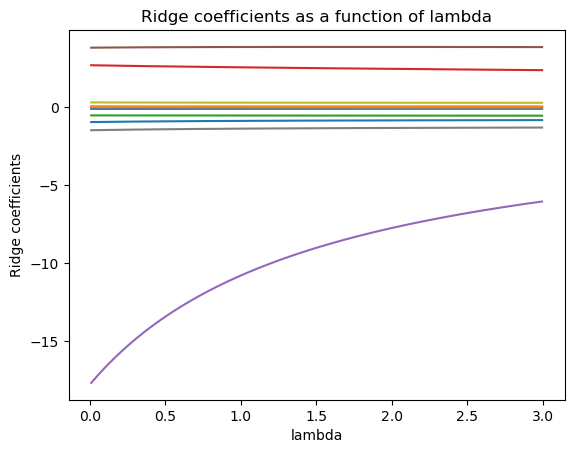

In [22]:
alphas = np.arange(0.01, 3, 0.005)

coefs = []
for a in alphas:
    model = RidgeCV(alphas=[a], cv=cv)
    model.fit(predictors, response)
    coefs.append(model.coef_)


# Gráfico

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('linear')
plt.xlabel('lambda')
plt.ylabel('Ridge coefficients')
plt.xlim(-1, 10)
plt.ylim(-15, 5)
plt.title('Ridge coefficients as a function of lambda')
plt.axis('tight')
plt.show()

In [23]:
#Shrinkage techniques

In [24]:
# The Elements of Statistical Learning  friedman, hastie, tibshirani

### Concepto: Gradiente de una función escalar

El vector gradiente de una función escalar $f(x_1, x_2, \ldots, x_n)$ de varias variables es un vector que contiene todas las derivadas parciales de esa función. **Indica la dirección en la cual la función aumenta más rápidamente**. La magnitud del gradiente te da la **tasa de incremento máximo en esa dirección**.

Formalmente, el vector gradiente se define como:

$$
\nabla f = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right]^T
$$

Donde:
- $\nabla f$ es el vector gradiente de la función $f$.
- $\frac{\partial f}{\partial x_i}$ representa la derivada parcial de $f$ con respecto a la variable $x_i$.
- $T$ indica transposición, asegurando que el gradiente se presente como un **vector columna**.

El vector gradiente apunta en la dirección del mayor aumento de la función y su magnitud indica cuán rápido aumenta la función en esa dirección. En el caso de una función de una **sola variable, el gradiente se reduce a la derivada de la función**.


<img src="quadraticprog.png" alt="Alt text" style="width: 800px;"/>

### En el punto mínimo el gradiente es cero:

<img src="quadratic_min_grad.png" alt="Alt text" style="width: 400px;"/>

### Visto desde arriba:
<img src="quadratic_projected.png" alt="Alt text" style="width: 800px;"/>

### Algoritmo Descenso de Gradiente (Gradient Descent)

1. **Inicializar** los parámetros $\beta$ y elegir una tasa de aprendizaje $\eta$ (learning rate).
2. **Repetir hasta convergencia:** Esto significa iterar hasta que el cambio en la función objetivo entre iteraciones sucesivas sea pequeño (menor que un umbral predefinido) o hasta alcanzar un número máximo de iteraciones.
   - Calcular el gradiente de la función objetivo $J(\beta)$ respecto a los parámetros, $\nabla_{\beta} J(\beta)$.
   - Actualizar los parámetros: $\beta_{t+1} = \beta_{t} - \eta \nabla_{\beta} J(\beta_{t})$.
3. **Detener** el proceso cuando se cumpla el criterio de salida (por ejemplo, convergencia alcanzada o número máximo de iteraciones).


### Ejemplo: implementación sencilla de Gradient Descent PARA MÍNIMO CUADRADOS ORDINARIOS:

In [25]:
# Generamos datos sintéticos
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)   # y = 4 + 3*x + error

# Agregar término constante a X
X_b = np.c_[np.ones((100, 1)), X]

# Parámetros del algoritmo de descenso de gradiente
learning_rate = 0.05
n_iterations = 1000
m = len(X_b)
tolerance = 1e-6 # Tolerancia para el cambio en la función de costo

theta = np.random.randn(2,1) # Inicialización aleatoria

cost_history = [np.inf] # Iniciar historial de costo con infinito

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #ESTE ES EL VECTOR GRADIENTE
    theta = theta - learning_rate * gradients  #ACTUALIZADNO EL PARÁMETRO
    cost = (1/m) * np.sum((X_b.dot(theta) - y)**2) # Calcular el nuevo costo
    if abs(cost_history[-1] - cost) < tolerance: # validar la condición de salida o "stop"
        print(f"Convergencia alcanzada en la iteración {iteration}.")
        break
    cost_history.append(cost)

print("Theta encontrados por descenso de gradiente:")
print(theta)


Convergencia alcanzada en la iteración 226.
Theta encontrados por descenso de gradiente:
[[4.21199475]
 [2.97747952]]


-- fin clase 28 Agosto

-- inicio clase 29 Agosto

## Regresión LASSO (least absolute shrinkage and selection operator)

La regresión LASSO es otra técnica de regresión lineal regularizada, muy similar a la regresión Ridge, pero con una diferencia clave en el tipo de penalización que aplica a los coeficientes. La regresión LASSO no sólo ayuda a tratar con multicolinealidad y a prevenir el sobreajuste, sino que también puede realizar selección de variables al forzar algunos coeficientes a ser **exactamente cero**. Esto significa que LASSO puede excluir automáticamente variables menos importantes del modelo, lo que es útil para la simplificación del modelo y la interpretación de los resultados.

La función de costo en la regresión LASSO se define como:

$$
J(\beta) = \text{MSE}(\beta) + \lambda \sum_{i=1}^{p} |\beta_i|
$$

Donde:
- $J(\beta)$ es la función de costo total.
- $\text{MSE}(\beta)$ es el error cuadrático medio.
- $\beta_i$ son los coeficientes del modelo para cada variable independiente (excluyendo el término de intercepción $\beta_0$).
- $\lambda$ es el parámetro de regularización. Al igual que en  Ridge, controla la intensidad de la penalización, pero aquí se aplica a la suma de los valores absolutos de los coeficientes.

La principal diferencia entre LASSO y Ridge es en el tipo de penalización: LASSO utiliza la suma de los valores absolutos de los coeficientes ($\ell_1$ penalización), mientras que Ridge utiliza la suma de los cuadrados ($\ell_2$ penalización). Esta diferencia hace que LASSO pueda reducir algunos coeficientes exactamente a cero, lo cual es una forma de realizar selección de variables dentro del proceso de modelado.

Ventajas de LASSO:
- **Selección de Variables:** LASSO puede identificar y descartar variables no informativas automáticamente.
- **Interpretabilidad:** Al reducir el número de variables, el modelo se hace más sencillo y fácil de interpretar.
- **Prevención del Sobreajuste:** Al igual que Ridge, ayuda a prevenir el sobreajuste limitando la magnitud de los coeficientes.

La selección del parámetro $\lambda$ es crucial en LASSO, donde un balance adecuado puede significar la diferencia entre un modelo bien ajustado y uno que no capta la complejidad o que ignora información importante. La validación cruzada suele ser el método preferido para encontrar un valor óptimo de $\lambda$.

Considera un conjunto de datos con muchas variables que intentan predecir el rendimiento académico de estudiantes. Algunas de estas variables pueden no tener un impacto significativo en el rendimiento. La regresión LASSO puede ser particularmente útil en este escenario, ya que automáticamente seleccionará las variables más relevantes $^{[nota]}$ (por ejemplo, horas de estudio, asistencia) y descartará las menos importantes, lo que resulta en un modelo más simple y enfocado.

La regresión LASSO es una herramienta adecuada en aquellos casos donde la simplicidad y la interpretabilidad del modelo son tan importantes como la precisión de las predicciones.

$nota$: cuidado con esta aseveración. Si bien LASSO sí puede hacer selección de variables, el orden en el que entre una variable al modelo puede ser la diferencia entre seleccionarla o no, así que tomar esto con cuidado

### Formulación del Problema LASSO

$$
\text{min}_{\beta} (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta) + \lambda \sum_{i=1}^{p} |\beta_i| \qquad\qquad\qquad ... (4)
$$

La expresión (4) es equivalente al problema de optimización:

$$
\begin{align}
\text{min}_{\beta}(\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta) \newline\newline
s.t. \sum_{i=1}^{p} |\beta_i| \leq t
\end{align}
$$

In [26]:
#Comentar:
# Si sólo tuviéramos un número 'pequeño' de variables predictoras, cuál es el mejor ajuste que podemos obtener en te´rminos de suma de
#cuadrados del error. 

# Una t suficientemente pequeña hace que los coefs se 'encojan' hacia el cero e incluso que algunos sean exactamente cero.

# A diferencia de OLS y Ridge, no existe una solución cerrada para LASSO (excepto cuando X es ortonormal)


#### Curvas de nivel SSE y región factible  [Tibshirani, 1996]

<img src="geom_lasso_ridge.png" alt="Alt text" style="width: 800px;"/>

El algoritmo que se utiliza para la optimización de LASSO se llama **descenso por coordenada (coordinate descent)**:

1. Para $j=0,1,\dots,p$
2. Calcula $\rho_j = \sum_{i=1}^n x_{ij}(y_{i}-\sum_{k \neq j}^p \beta_k x^{(i)}_k)$
3. Calcula $z_j = \sum_{i=1}^n (x_{ij})^2$
4. Actualiza $\beta_j = \frac{1}{z_j}S(\rho_j,\lambda)$

5. Repetir pasos 2-4 hasta convergencia

donde $S(x,\lambda)  = \text{sign}(x) \cdot \max(|x| - \lambda, 0)$ 

A $S()$ se le conoce como el operador "Soft Thresholding"

El soft thresholding es una operación importante en la solución de LASSO  y otros problemas de optimización, especialmente cuando se utilizan métodos de descenso de coordenadas. Es una forma de fomentar 'sparcity' en los parámetros del modelo, realizando una selección de variables al establecer algunos coeficientes en cero.

### ¿Qué es el soft thresholding?

El soft thresholding es una operación aplicada a cada coeficiente durante el paso de actualización en el algoritmo de optimización. Se define por la siguiente función:

$$
S_{\lambda}(x) = \text{sign}(x) \cdot \max(|x| - \lambda, 0)
$$

donde:
- $S_{\lambda}(x)$ es el valor de $x$ después del soft thresholding,
- $\lambda$ es el parámetro de umbral (relacionado con el parámetro de regularización $\alpha$ en LASSO),
- $x$ es el valor original del coeficiente,
- $\text{sign}(x)$ devuelve el signo de $x$ (ya sea -1, 0 o 1).

### ¿Cómo Funciona?

1. **Reducción de Magnitud:** El soft thresholding reduce la magnitud de cada coeficiente por el umbral $\lambda$, pero nunca por debajo de cero. Esta operación puede reducir a cero los coeficientes pequeños.

2. **Preservación del Signo:** La operación preserva el signo del coeficiente original. Si $x$ es positivo, $S_{\lambda}(x)$ también será positivo (o cero si $x$ es menor que $\lambda$). De manera similar, si $x$ es negativo, el valor después del umbralizado será negativo o cero.

3. **Fomenta 'sparcity':** Al establecer coeficientes pequeños en cero, el soft thresholding ayuda a identificar las variables más relevantes en un modelo. En conjuntos de datos de alta dimensión, donde el número de variables puede ser muy grande, esta propiedad es  valiosa.

### Ejemplos:

Si $x$ = 5 y $\lambda$ = 3:
$$
S_{3}(5)= sign(5) \cdot \max(5 - 3, 0) = 1\times 2 = 2 
$$

En nuestro ejemplo de regresión LASSO para predecir precios de casas basado en varias características, si tenemos un coeficiente $\beta = 0.02$ con un umbral $\lambda = 0.05$. El soft thresholding ajustaría este coeficiente a cero porque su magnitud es menor que el umbral, indicando que esta característica  podría no ser relevante para el modelo.

En contraste, para un coeficiente $\beta = 0.1$ con el mismo umbral, el soft thresholding reduciría su magnitud pero lo mantendría no nulo ($S_{0.05}(0.1) = 0.05$), preservando su influencia en el modelo.

<img src="soft_th.png" alt="Alt text" style="width: 400px;"/>

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
df = pd.read_csv('boston_house_prices.csv')
df.head()

,id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,A1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,A2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,A3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,A4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,A5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Implementando LASSO con LassoCV de Scikit-learn

Dos parámetros importantes de LassoCV:

1. cv: el número de 'folds' de validación cruzada que se utilizan para evaluar el rendimiento del modelo. Por defecto es None, lo que significa que se utiliza una estrategia k=5. Si se establece en un entero k, se utiliza la estrategia de validación cruzada K-fold, con k folds.

2. alphas: una lista o arreglo de valores de $\alpha$ (lambdas) para probar. Si se establece como None, se utilizará una secuencia predeterminada de valores.

In [29]:
from sklearn.linear_model import LassoCV

# Cargar los datos y asignar predictoras (X) y respuesta (y):
predictors = df.loc[:, 'CRIM':'LSTAT']
response = df['MEDV']

#PARTICIONANDO los datos en conjunto de entrenamiento y prueba (testing).
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.25, random_state=42)

# Escalar los datos usando StandardScaler
scaler = StandardScaler()  # Z= (X - promedio)/ desv_std
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Crear un modelo de regresión LASSO con validación cruzada para determinar el parámetro de regularización lambda (alphas)
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# imprimir el valor óptimo de lambda (parámetro de regularización):
print(f"valor óptimo de lambda: {lasso_cv.alpha_: .3f}")

#imprimir los coeficientes del modelo:
coeficientes = dict(zip(predictors.columns, lasso_cv.coef_))
for variable, coef in coeficientes.items():
    print(f"{variable}:{coef: .3f}")

valor óptimo de lambda:  0.007
CRIM:-1.044
ZN: 0.649
INDUS: 0.277
CHAS: 0.738
NOX:-1.887
RM: 3.145
AGE:-0.240
DIS:-2.907
RAD: 2.091
TAX:-1.532
PTRATIO:-2.073
B: 1.143
LSTAT:-3.696


In [30]:
# Notemos que ninguno de los coeficientes fue cero en este caso. ¿Por qué?
# Porque tenemos predictoras que en vdad están asociadas con la variable respuesta
# También, no tenemos muchas variables predictoras.

In [31]:
# predict y mse
y_lasso = lasso_cv.predict(X_test_scaled)
z = (y_lasso - y_test)**2
z.sum()/len(z)

22.11064649660294

In [32]:
22.11/24.88-1 # mEJORAMOS el error de predicción en 11.13% wrt a OLS
#Recordar que el error de Ridge fue de 21.79 (12.4% menos que OLS)

-0.1113344051446945

In [33]:
### Coordinate Descent para LASSO

In [34]:
def soft_thresholding(x, gamma): #ver figura Soft threshold vs OLS arriba
    if x > 0 and gamma < abs(x):
        return x-gamma
    elif x < 0 and gamma < abs(x):
        return x+gamma
    else:
        return 0

# Coordinate descent para lasso

def coordinate_descent_lasso(X, y, alpha, max_iter=100, tol=0.001):
    """Coordinate descent para Lasso"""
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    w_old = np.zeros(n_features)  # inicializamos w_old
    for i in range(max_iter):
        for j in range(n_features):
            X_j = X[:, j]
            y_pred = X @ w
            r = y - y_pred + w[j] * X_j
            w[j] = soft_thresholding(np.dot(X_j, r) / n_samples, alpha / n_samples)
        if np.max(np.abs(w - w_old)) < tol:
            break
        w_old = w.copy()  # actualizamos w_old
    return w

In [35]:
c_lasso = coordinate_descent_lasso(X_train_scaled, y_train, alpha=0.007, max_iter=1000)
c_lasso

array([-1.06423852,  0.67998084,  0.33787068,  0.73772321, -1.93188992,
        3.14307464, -0.25710817, -2.95542152,  2.20676774, -1.64467811,
       -2.08677573,  1.15217142, -3.69376277])

In [36]:
coefs_lasso = pd.Series(c_lasso, predictors.columns)
coefs_lasso

CRIM      -1.064239
ZN         0.679981
INDUS      0.337871
CHAS       0.737723
NOX       -1.931890
RM         3.143075
AGE       -0.257108
DIS       -2.955422
RAD        2.206768
TAX       -1.644678
PTRATIO   -2.086776
B          1.152171
LSTAT     -3.693763
dtype: float64

## Elastic Net: Una combinación de Ridge y Lasso

La regresión Elastic Net es una técnica que combina las fortalezas de dos métodos de regularización: LASSO ($\ell_1$) y Ridge ($\ell_2$). Esto  permite que Elastic Net herede las ventajas de ambos, siendo particularmente útil en situaciones donde hay muchas variables correlacionadas entre sí o cuando el número de predictores supera el número de observaciones. Elastic Net **puede** reducir la variabilidad en las estimaciones de los coeficientes y realizar una selección de variables más efectiva que LASSO o Ridge por sí solos.

La función de costo de la regresión Elastic Net se define como:

$$
J(\beta) = \text{MSE}(\beta) + r \alpha \sum_{i=1}^{p} |\beta_i| + \frac{1-r}{2} \alpha \sum_{i=1}^{p} \beta_i^2
$$

Donde:
- $J(\beta)$ es la función de costo total.
- $\text{MSE}(\beta)$ es el error cuadrático medio, el mismo de mínimos cuadrados.
- $\beta_i$ son los coeficientes del modelo para cada variable independiente (excluyendo el término de intercepción $\beta_0$).
- $\alpha$ es el parámetro de regularización que controla la intensidad total de la penalización.
- $r$, conocido como $\ell_1$- ratio, es el parámetro que equilibra la proporción de las penalizaciones $\ell_1$ y $\ell_2$, con valores que van de 0 a 1.

Ventajas de Elastic Net:

- **Manejo de Colinealidad** 
- **Selección de Variables:** Puede reducir algunos coeficientes a cero, lo que significa que realiza selección de variables, eliminando predictores no informativos del modelo.
- **Estabilidad:** En escenarios donde el número de predictores es mayor que el número de observaciones, o cuando hay un grupo de variables altamente correlacionadas, Elastic Net tiende a ser más estable que LASSO o Ridge por separado.


El problema de optimización es:
$$
\text{min}_{\beta}\frac{1}{2n} (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta) + r \alpha \sum_{i=1}^{p} |\beta_i| + \frac{1-r}{2} \alpha \sum_{i=1}^{p} \beta_i^2
$$

1. $\ell_1$- ratio = 1 --> Elastic Net se reduce a Lasso
2. $\ell_1$- ratio = 0 --> Elastic Net se reduce a Ridge

In [ ]:
#motivación:
# 1. Si p > n, Lasso selecciona a LO MÁS n variables. 
# 2. Si hay grupos de variables correlacionadas, LASSO selecciona UNA de esas variables, sin importar. 
# 3. para n > p , si hay mucha colinealidad, Ridge tiende a desempeñar mejor que LASSO.

#### Nota:
El valor óptimo de $r$ y $\alpha$ depende del grado de colinealidad de los datos, del proceso generador de los coeficientes 'verdaderos', del número de predictoras y de la relación entre predictoras y variable respuesta


#### Región factible de los coeficientes de Elastic Net

<img src="en_region.png" alt="Alt text" style="width: 800px;"/>

In [38]:
# Implementar modelo
from sklearn.linear_model import ElasticNetCV

#aSIGNAR X, y:
predictors = df.loc[:, 'CRIM':'LSTAT']
response = df['MEDV']

#PARTICIONANDO los datos en conjunto de entrenamiento y prueba (testing).
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.25, random_state=42)

#estandarizar los datos:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#crear el modelo de Elastic Net con validación cruzada con DIFERENTES l1_ratio:

elastic_net_cv = ElasticNetCV(l1_ratio = np.arange(0.01, 1, 0.001),
                             n_alphas = 100, cv = 5, max_iter=10000)
elastic_net_cv.fit(X_train_scaled, y_train)

#Imprimir valores óptimos de alpha (parámetro de regularización) y de l_1 ratio
print(f"Alpha óptimo: {elastic_net_cv.alpha_}")
print(f"L1_ratio óptimo: {elastic_net_cv.l1_ratio_}") #r óptima

Alpha óptimo: 0.031269227497471096
L1_ratio óptimo: 0.2239999999999998


In [39]:
coefs_en = pd.Series(elastic_net_cv.coef_, predictors.columns)
coefs_en

CRIM      -0.961947
ZN         0.529972
INDUS      0.101739
CHAS       0.764264
NOX       -1.629700
RM         3.174487
AGE       -0.244340
DIS       -2.609664
RAD        1.565742
TAX       -1.096079
PTRATIO   -1.981436
B          1.117020
LSTAT     -3.592074
dtype: float64

In [40]:
y_en = elastic_net_cv.predict(X_test_scaled)
z = (y_en - y_test)**2
z.sum()/len(z)

22.285836866693465

In [41]:
22.28/24.88-1  #mejoramos 10.45% vs OLS
#OLS < EN < LASSO < RIDGE en ESTE CONJUNTO DE DATOS. 

-0.10450160771704176